# China's Image in Europe Before and After the Outbreak of Covid-19
##           ——An Analysis of News Reports from European Media

The notebook records all the codes I used for a project where I was required to do some analysis about Covid-19. I used the data from GDELT, a database provided by google, which monitors and documents global news and uses deep learning algorithm and NLP to obtain news coverage intensity and news sentiments from them. All the work I did here was to present how European news media report China and what the difference of China's national image before and after the outbreak of Covid-19 is.

### Data Source: 
##### summary.gdeltproject.org
### Variables: 
##### Time; 
##### Country Name (46 European countries);
#####                   Coverage Intensity (the proportion of news associated with a specific topic); 
#####                   News Tone (negative number presents negative sentiment; postive number presents postive sentiment)
### Research Questions:
##### Is China a country frequently reported by European media?
##### Is China frequently reported in a postive tone or a negative tone?
##### What is the effect of Covid-19 to news coverage about China?
##### What is the effect of Covid-19 to news tone about China?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Merge data files sperated by country into one and save it

#### Merge data files of coverage intensity

In [3]:
dir_list = os.listdir('C:/Users/24729/Desktop/C_T/intensity')
dir_list[:5]

['V albania.csv',
 'V andorra.csv',
 'V austria.csv',
 'V belarus.csv',
 'V belgium.csv']

In [4]:
#creat initial datafile
euro_intensity = pd.read_csv('C:/Users/24729/Desktop/C_T/intensity/' + dir_list[0]).rename(columns = {'Value':dir_list[0][2:-4]})
euro_intensity.head()

,Date,Series,albania
0,2018-10-27,Volume Intensity,0.0035
1,2018-10-28,Volume Intensity,0.0026
2,2018-10-29,Volume Intensity,0.0021
3,2018-10-30,Volume Intensity,0.0021
4,2018-10-31,Volume Intensity,0.0019


In [5]:
for file in dir_list[1:]:
    df = pd.read_csv('C:/Users/24729/Desktop/C_T/intensity/' + file).rename(columns = {'Value':file[2:-4]})
    euro_intensity = pd.merge(euro_intensity, df[['Date', file[2:-4]]], how = 'left', on = 'Date')

In [6]:
euro_intensity.head()

,Date,Series,albania,andorra,austria,belarus,belgium,Bosnia-Herzegovina,bulgaria,croatia,...,san marino,serbia,SlovakRepublic,slovenia,spain,sweden,Switzerland,UK,ukraine,vatican city
0,2018-10-27,Volume Intensity,0.0035,0.0000,0.0081,0.0051,0.0013,0.0011,0.0119,0.0048,...,0.0,0.0092,0.0065,0.0011,0.0356,0.0132,0.0194,0.0571,0.0469,0.0003
1,2018-10-28,Volume Intensity,0.0026,0.0000,0.0068,0.0091,0.0043,0.0006,0.0188,0.0060,...,0.0,0.0071,0.0068,0.0000,0.0424,0.0268,0.0114,0.0581,0.0641,0.0000
2,2018-10-29,Volume Intensity,0.0021,0.0005,0.0076,0.0102,0.0095,0.0021,0.0181,0.0050,...,0.0,0.0115,0.0036,0.0003,0.0289,0.0289,0.0237,0.0924,0.0523,0.0002
3,2018-10-30,Volume Intensity,0.0021,0.0000,0.0077,0.0065,0.0078,0.0028,0.0140,0.0034,...,0.0,0.0060,0.0034,0.0000,0.0228,0.0272,0.0204,0.0817,0.0554,0.0000
4,2018-10-31,Volume Intensity,0.0019,0.0000,0.0050,0.0091,0.0088,0.0006,0.0170,0.0056,...,0.0,0.0071,0.0059,0.0000,0.0284,0.0224,0.0231,0.1058,0.0592,0.0000


In [7]:
euro_intensity.to_csv('C:/Users/24729/Desktop/C_T/total/euro_intensity.csv')

#### Merge data files of news tone

In [8]:
dir_list_or = os.listdir('C:/Users/24729/Desktop/C_T/tone')
dir_list = list(x.replace('_T','').replace('tone ','') for x in dir_list)

In [9]:
euro_tone = pd.read_csv('C:/Users/24729/Desktop/C_T/tone/'+dir_list_or[0]).rename(columns = {'Value':dir_list[0][2:-4]})
euro_tone.head()

,Date,Series,albania
0,2018-10-27,Average Tone,0.6872
1,2018-10-28,Average Tone,-3.0325
2,2018-10-29,Average Tone,0.4970
3,2018-10-30,Average Tone,-0.0355
4,2018-10-31,Average Tone,2.0003


In [10]:
for file in dir_list_or[1:]:
    name = file.replace('_T','').replace('tone ','').replace('.csv','')
    df = pd.read_csv('C:/Users/24729/Desktop/C_T/tone/' + file).rename(columns = {'Value':name})
    euro_tone = pd.merge(euro_tone, df[['Date', name]], how = 'left', on = 'Date')

In [11]:
euro_tone.head()

,Date,Series,albania,Andorra,Bosnia-Herzegovina,Bulgaria,Croatia,Greece,Italy,Kosovo,...,netherlands,norway,poland,russia,slovakrepublic,sweden,switzerland,UK,ukraine,Vatican City
0,2018-10-27,Average Tone,0.6872,0.0000,0.5435,-0.4335,-0.8582,-1.5289,0.6580,-1.1198,...,1.7598,-1.9630,-0.9657,-1.1593,-0.0878,0.2242,-0.6182,-0.3946,-1.0022,1.0787
1,2018-10-28,Average Tone,-3.0325,0.0000,-0.5750,-0.9152,0.7611,-1.8056,0.2104,1.9876,...,-2.7381,-1.0633,0.0930,-1.1780,-2.1612,-0.7193,-0.9069,-1.9469,-1.6986,0.0000
2,2018-10-29,Average Tone,0.4970,-1.3516,-0.3899,0.0886,0.3983,-1.5266,0.1725,-1.9258,...,0.6230,-1.3090,-0.7558,-1.1134,-3.2824,-2.2349,-1.0530,-0.7405,-1.4490,-0.8772
3,2018-10-30,Average Tone,-0.0355,0.0000,-0.9813,-0.6104,0.1194,-1.6850,0.0155,-0.9853,...,0.4975,-2.4084,-1.7569,-1.0636,-0.4982,-4.4266,-0.8318,-0.9292,-1.2130,0.0000
4,2018-10-31,Average Tone,2.0003,0.0000,2.1601,-0.2235,0.6185,-1.6469,0.2475,-1.5151,...,1.0869,-0.2437,-0.5591,-1.0586,-3.2522,0.2595,-0.5478,-0.9631,-1.3477,0.0000


In [91]:
euro_tone.to_csv('C:/Users/24729/Desktop/C_T/tone/euro_tone.csv')

In [12]:
euro_tone.columns = list(x.capitalize() for x in euro_tone.columns)
euro_tone = euro_tone.rename(columns = {'Dennmark':'Denmark'})

In [13]:
euro_intensity.columns = list(x.capitalize() for x in euro_intensity.columns)
euro_intensity = euro_intensity.rename(columns = {'Faroeislands':'Faroe islands'})

### Plot coverage intensity and news tone of each country into an x-y coordinate and do a cluster analysis

In [14]:
point = pd.DataFrame([np.mean(euro_intensity),np.mean(euro_tone)]).T.rename(columns = {0:'Intensity', 1:'Tone'})

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled_point = scaler.fit_transform(point)

In [18]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_point)
    sse.append(kmeans.inertia_)


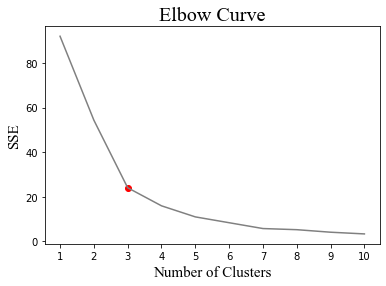

In [19]:
plt.plot(range(1, 11), sse, 'gray')
plt.scatter(3,sse[2], c = 'red', alpha = 1)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters",fontsize = 15, **{'fontname':'Times New Roman'})
plt.ylabel("SSE",fontsize = 15, **{'fontname':'Times New Roman'})
plt.title('Elbow Curve', fontsize = 20, **{'fontname':'Times New Roman'})
plt.savefig('C:/Users/24729/Desktop/Elbow_Curve.png', figsize = (30,40), dpi = 300, bbox_inches = 'tight')
plt.show()

<Figure size 18000x24000 with 0 Axes>

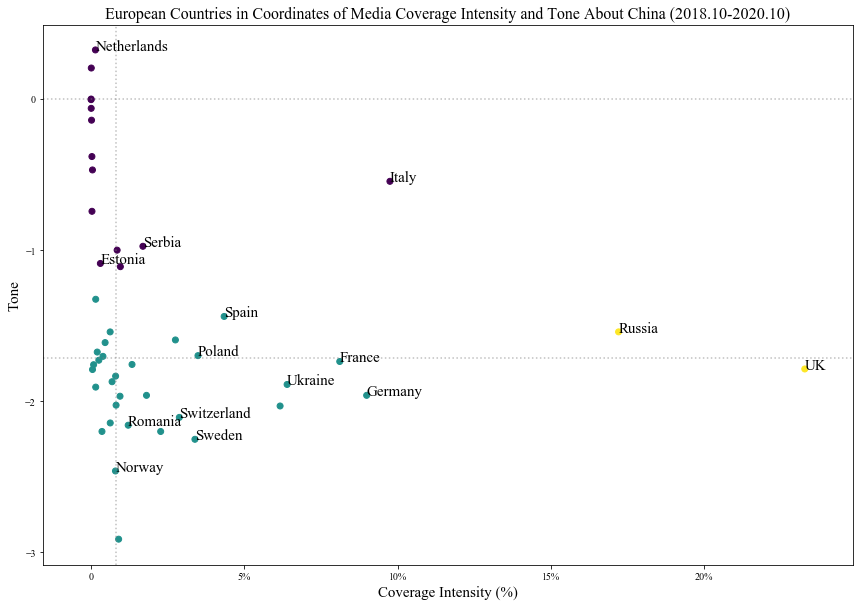

In [20]:
kmeans = KMeans(n_clusters = 3).fit(scaled_point)

plt.figure(figsize = (60,80), dpi = 300)
fig, ax = plt.subplots()
plt.subplots_adjust(right = 2, top = 2)
plt.scatter(point['Intensity'],point['Tone'], label = point.index,c= kmeans.labels_.astype(float))

#    plt.annotate(point.index[i], (item[0]+0.05, item[1]+0.05))
plt.axhline(point['Tone'].median(), color = 'gray', alpha = 0.5, linestyle = ':')
plt.axvline(point['Intensity'].median(), color = 'gray', alpha = 0.5, linestyle = ':')
plt.axhline(0, color = 'gray', alpha = 0.5, linestyle = ':')
plt.annotate('UK',tuple(list(point.loc['Uk'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Germany', tuple(list(point.loc['Germany'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('France', tuple(list(point.loc['France'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Italy', tuple(list(point.loc['Italy'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Spain', tuple(list(point.loc['Spain'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Russia', tuple(list(point.loc['Russia'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Norway', tuple(list(point.loc['Norway'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Netherlands', tuple(list(point.loc['Netherlands'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Sweden', tuple(list(point.loc['Sweden'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Switzerland', tuple(list(point.loc['Switzerland'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Poland', tuple(list(point.loc['Poland'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Ukraine', tuple(list(point.loc['Ukraine'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Serbia', tuple(list(point.loc['Serbia'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Romania', tuple(list(point.loc['Romania'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.annotate('Estonia', tuple(list(point.loc['Estonia'])), fontsize = 15,**{'fontname':'Times New Roman'})
plt.xlabel('Coverage Intensity (%)', fontsize = 15, **{'fontname':'Times New Roman'})
plt.ylabel('Tone', fontsize = 15, **{'fontname':'Times New Roman'})
plt.title('European Countries in Coordinates of Media Coverage Intensity and Tone About China (2018.10-2020.10)', fontsize = 16,
          **{'fontname':'Times New Roman'})
plt.xticks([0,0.05,0.1,0.15,0.2], ['0','5%', '10%', '15%', '20%'], **{'fontname':'Times New Roman'})
plt.yticks([-3,-2,-1,0], **{'fontname':'Times New Roman'})
plt.savefig('C:/Users/24729/Desktop/In_To.png', figsize = (60,80),dpi = 300, bbox_inches='tight')
plt.show()


### Make bar charts about coverage intensity and news tone

In [21]:
import seaborn as sns

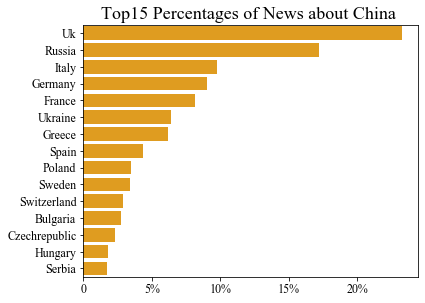

In [22]:
plt.figure()
plt.subplots_adjust(top = 1)
sns.barplot(data = pd.DataFrame(point.sort_values('Intensity', ascending = False)['Intensity'].iloc[:15]).T, orient = 'h', color = 'orange')
plt.xticks([0,0.05,0.1,0.15,0.2],[0,'5%','10%','15%','20%' ],**{'fontname':'Times New Roman'}, fontsize = 12)
plt.yticks(**{'fontname':'Times New Roman'}, fontsize = 12)
plt.title('Top15 Percentages of News about China ',**{'fontname':'Times New Roman'}, fontsize = 18 )
plt.savefig('C:/Users/24729/Desktop/Top15_Coverage.png', figsize = (60,80),dpi = 300, bbox_inches='tight')

In [23]:
top10_In = pd.DataFrame(pd.DataFrame(point.sort_values('Intensity', ascending = False)['Intensity'])).T[['Germany','Uk','France',
                                                                                         'Italy','Russia','Spain',
                                                                                         'Switzerland','Poland','Sweden','Netherlands']]
top10_To = pd.DataFrame(pd.DataFrame(point.sort_values('Tone', ascending = False)['Tone'])).T[['Germany','Uk','France',
                                                                                         'Italy','Russia','Spain',
                                                                                         'Switzerland','Poland','Sweden','Netherlands']]

In [24]:
top10_To.T.sort_values('Tone').index

Index(['Sweden', 'Switzerland', 'Germany', 'Uk', 'France', 'Poland', 'Russia',
       'Spain', 'Italy', 'Netherlands'],
      dtype='object')

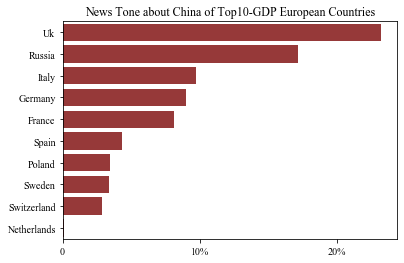

In [25]:
plt.figure()
sns.barplot(data = top10_In.T.sort_values('Intensity', ascending = False).T, orient = 'h', color = 'brown')
plt.title('News Tone about China of Top10-GDP European Countries',**{'fontname':'Times New Roman'})
plt.yticks(list(range(10)),list(top10_In.T.sort_values('Intensity', ascending = False).index),**{'fontname':'Times New Roman'})
plt.xticks([0,0.1,0.2],[0,'10%','20%'],**{'fontname':'Times New Roman'})
plt.savefig('C:/Users/24729/Desktop/Top10_Intensity.png', figsize = (60,80),dpi = 300, bbox_inches='tight')

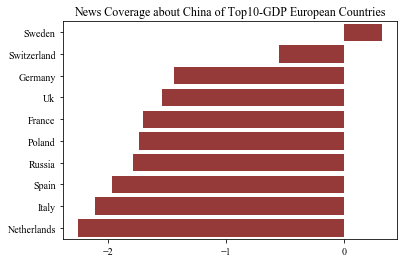

In [26]:
plt.figure()
sns.barplot(data = top10_To.T.sort_values('Tone', ascending = False).T, orient = 'h', color = 'brown')
plt.title('News Coverage about China of Top10-GDP European Countries',**{'fontname':'Times New Roman'})
plt.yticks(list(range(10)),list(top10_To.T.sort_values('Tone').index),**{'fontname':'Times New Roman'})
plt.xticks([-2,-1,0],**{'fontname':'Times New Roman'})
plt.savefig('C:/Users/24729/Desktop/Top10_Tone.png', figsize = (60,80),dpi = 300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

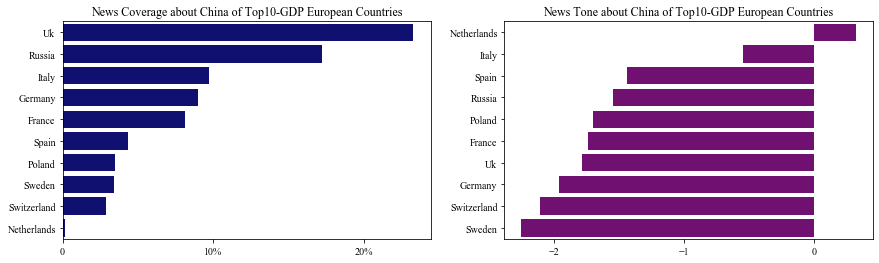

In [27]:
plt.figure()
plt.subplots(1,2)
plt.subplot(1,2,1)
sns.barplot(data = top10_In.T.sort_values('Intensity', ascending = False).T, orient = 'h', color = 'navy')
plt.title('News Coverage about China of Top10-GDP European Countries',**{'fontname':'Times New Roman'})
plt.yticks(list(range(10)),list(top10_In.T.sort_values('Intensity', ascending = False).index),**{'fontname':'Times New Roman'})
plt.xticks([0,0.1,0.2],[0,'10%','20%'],**{'fontname':'Times New Roman'})
plt.subplot(1,2,2)
plt.subplots_adjust(right=2)
sns.barplot(data = top10_To.T.sort_values('Tone', ascending = False).T, orient = 'h', color = 'purple')
plt.title('News Tone about China of Top10-GDP European Countries',**{'fontname':'Times New Roman'})
plt.yticks(list(range(10)),list(top10_To.T.sort_values('Tone', ascending = False).index),**{'fontname':'Times New Roman'})
plt.xticks([-2,-1,0],**{'fontname':'Times New Roman'})

plt.savefig('C:/Users/24729/Desktop/Top10_Tone_Intensity_Compare.png', figsize = (60,80),dpi = 300, bbox_inches='tight')
plt.show()

### Creat a stacked dataframe

In [28]:
initial_df = euro_tone[['Date','Albania']].rename(columns = {'Albania':'Intensity'})
initial_df['Country'] = 'Albania'
initial_df.head()

,Date,Intensity,Country
0,2018-10-27,0.6872,Albania
1,2018-10-28,-3.0325,Albania
2,2018-10-29,0.4970,Albania
3,2018-10-30,-0.0355,Albania
4,2018-10-31,2.0003,Albania


In [29]:
for item in euro_tone.columns[3:]:
    df = euro_tone[['Date',item]].rename(columns = {item:'Intensity'})
    df['Country'] = item
    initial_df = initial_df.append(df)

In [272]:
initial_df.to_excel('C:/Users/24729/Desktop/C_T/total/euro_total.xlsx')

### Make a special line chart

In [30]:
global_t = pd.read_csv('C:/Users/24729/Desktop/C_T/global_tone.csv')

In [31]:
global_t['Date'] = pd.to_datetime(global_t['Date'])

In [32]:
global_t_before = global_t[global_t['Date'] < '2020']

In [33]:
global_t_before['md'] = global_t_before['Date'].apply(lambda x: x.strftime('%m-%d'))

C:\Users\24729\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
max_tone = global_t_before.groupby('md')['Value'].max()
min_tone = global_t_before.groupby('md')['Value'].min()
date = list(range(365))

In [35]:
global_t['md'] = global_t['Date'].apply(lambda x: x.strftime('%m-%d'))
all_max = global_t.iloc[global_t.groupby('md')['Value'].idxmax()]
tone_2020 = global_t[global_t['Date']>='2020-01-01']
all_min = global_t.iloc[global_t.groupby('md')['Value'].idxmin()]
min_2020 = all_min[(all_min['Date'] >= '2020-01-01') & (all_min['Date'] != '2020-02-29')]
max_2020 = all_max[(all_max['Date'] >= '2020-01-01') & (all_max['Date'] != '2020-02-29')]

In [38]:
min_2020['ref'] = '2019-12-31'
min_2020['ref'] = pd.to_datetime(min_2020['ref'])
min_2020['med'] = (min_2020['Date'] - min_2020['ref'])
min_2020['index'] = min_2020['med'].apply(lambda x:int(str(x).replace(' days 00:00:00',''))-1)
max_2020['ref'] = '2019-12-31'
max_2020['ref'] = pd.to_datetime(max_2020['ref'])
max_2020['med'] = (max_2020['Date'] - max_2020['ref'])
max_2020['index'] = max_2020['med'].apply(lambda x:int(str(x).replace(' days 00:00:00',''))-1)
max_2020.head()

C:\Users\24729\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\24729\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\24729\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Date,Series,Value,covid,md,ref,med,index
1097,2020-01-05,Average Tone,-0.4438,0,01-05,2019-12-31,5 days,4
1098,2020-01-06,Average Tone,-0.5340,0,01-06,2019-12-31,6 days,5
1099,2020-01-07,Average Tone,-0.6076,0,01-07,2019-12-31,7 days,6
1100,2020-01-08,Average Tone,-0.6126,0,01-08,2019-12-31,8 days,7
1102,2020-01-10,Average Tone,-0.3079,0,01-10,2019-12-31,10 days,9


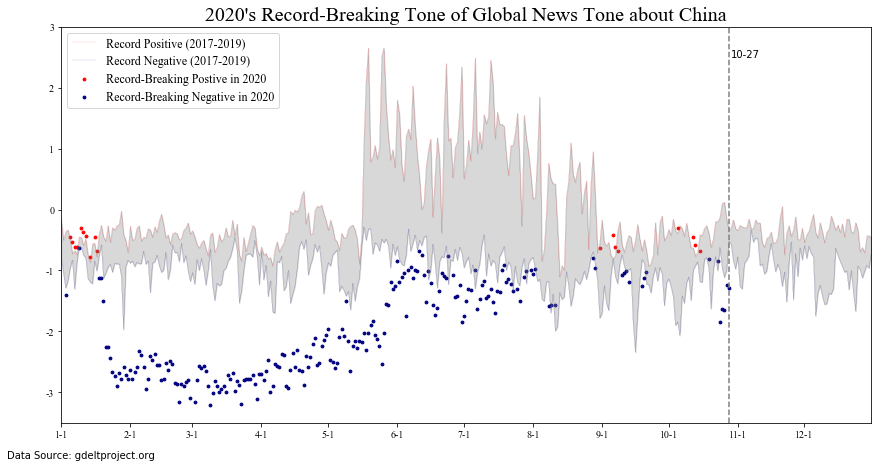

In [37]:
import matplotlib.ticker as ticker
import matplotlib.dates as dates
import matplotlib.font_manager as font_manager

plt.figure()
plt.subplots_adjust(right = 2, top = 1.5)
plt.plot(date, max_tone, 'red', linewidth = 0.1, label = 'Record Positive (2017-2019)')
plt.plot(date, min_tone, 'navy', linewidth = 0.1, label = 'Record Negative (2017-2019)')
plt.scatter(max_2020['index'], max_2020['Value'], s = 8, c = 'red', label = 'Record-Breaking Postive in 2020')
plt.scatter(min_2020['index'], min_2020['Value'], s = 8, c = 'navy', label = 'Record-Breaking Negative in 2020')
ax = plt.gca()
ax.fill_between(date, max_tone, min_tone, color = 'gray', alpha = 0.3)
ax.xaxis.set_major_locator(dates.MonthLocator( ))
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
plt.axis([0,364,-3.5,3])
plt.yticks(list(range(-3,4)), list(range(-3,4)), **{'fontname':'Times New Roman'})
plt.xticks([0,31,59, 90, 120, 151, 181, 212, 243, 273, 304, 334],['1-1','2-1','3-1','4-1','5-1','6-1','7-1','8-1','9-1','10-1','11-1','12-1'],**{'fontname':'Times New Roman'})
plt.figtext(0,0,'Data Source: gdeltproject.org')
plt.title("2020's Record-Breaking Tone of Global News Tone about China", fontsize = 20,**{'fontname':'Times New Roman'})
font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=12)
ax.legend(prop=font)

plt.axvline(300, linestyle = '--', color = 'gray')
plt.annotate('10-27', (301,2.5))
plt.savefig('C:/Users/24729/Desktop/Record-Breaking_Tone.png', figsize = (60,80),dpi = 300, bbox_inches='tight')

### Line chart of global tone about China

In [39]:
tone = pd.read_csv('C:/Users/24729/Desktop/C_T/global_tone.csv')
tone['Date'] = pd.to_datetime(tone['Date'])
tone.head()

,Date,Series,Value,covid
0,2017-01-01,Average Tone,-0.7864,0
1,2017-01-02,Average Tone,-1.0455,0
2,2017-01-03,Average Tone,-0.9408,0
3,2017-01-04,Average Tone,-1.0277,0
4,2017-01-05,Average Tone,-0.9555,0


In [40]:
mean = tone[tone['covid'] == 0]['Value'].mean()
std = tone[tone['covid'] == 0]['Value'].std()
mean, std

(-0.5672685765443152, 0.642024150417698)

In [41]:
tone['up'] = mean+2*std
tone['down'] = mean-2*std

In [43]:
date = np.arange('2020-01-25','2020-05-25', dtype='datetime64[D]')

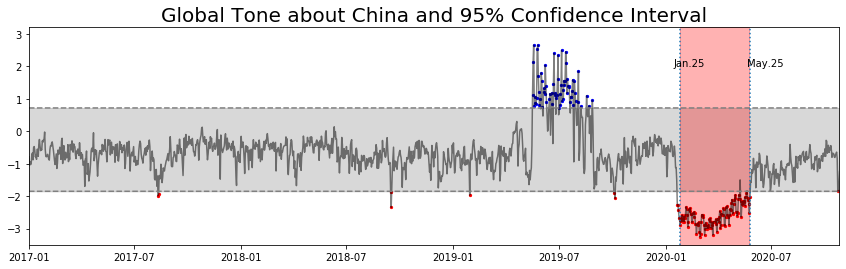

In [44]:
plt.figure()
plt.subplots_adjust(right = 2)
plt.plot(tone['Date'], tone['Value'], c = 'black', alpha = 0.5)
plt.plot(tone['Date'], tone['up'], c = 'gray', linestyle = '--')
plt.plot(tone['Date'], tone['down'], c = 'gray', linestyle = '--')
plt.scatter(tone[tone['Value'] < tone['down']]['Date'],tone[tone['Value'] < tone['down']]['Value'], c= 'red', s = 5)
plt.scatter(tone[tone['Value'] > tone['up']]['Date'],tone[tone['Value'] > tone['up']]['Value'], c= 'blue', s = 5 )
ax = plt.gca()
ax.fill_between(tone['Date'], tone['up'], tone['down'], color = 'gray', alpha = 0.3)
plt.axvline(pd.to_datetime('2020-01-25'), linestyle = ':')
plt.axvline(pd.to_datetime('2020-05-25'), linestyle = ':')
ax.fill_between(date, 3.2, -3.5, color = 'red', alpha = 0.3)
plt.axis([pd.to_datetime('2017-01-01'),pd.to_datetime('2020-10-25'),-3.5, 3.2])
plt.annotate('Jan.25', (pd.to_datetime('2020-01-15'), 2))
plt.annotate('May.25', (pd.to_datetime('2020-05-20'), 2))
plt.title('Global Tone about China and 95% Confidence Interval', fontsize = 20)
plt.savefig('C:/Users/24729/Desktop/95_CI.png', figsize = (60,80),dpi = 300, bbox_inches='tight')

### Line chart of global coverage intensity about China

In [45]:
coverage = pd.read_csv('C:/Users/24729/Desktop/C_T/Global_noChina_C.csv')
coverage['Date'] = pd.to_datetime(coverage['Date'])
coverage.head()

,Date,Series,Value
0,2018-10-27,Volume Intensity,3.5850
1,2018-10-28,Volume Intensity,3.5562
2,2018-10-29,Volume Intensity,4.6008
3,2018-10-30,Volume Intensity,4.6106
4,2018-10-31,Volume Intensity,4.6154


In [46]:
coverage['covid'] = (coverage['Date'] >= pd.to_datetime('2020-1-25'))

In [47]:
mean = coverage[coverage['covid'] == 0]['Value'].mean()
std = coverage[coverage['covid'] == 0]['Value'].std()
mean, std

(4.7099613186813185, 1.0227501607527827)

In [48]:
coverage['up'] = mean+2*std
coverage['down'] = mean-2*std

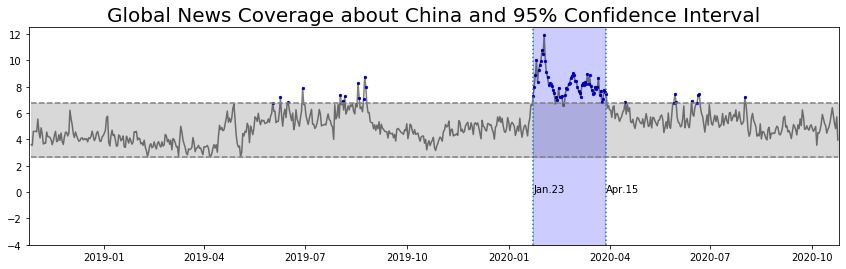

In [49]:
plt.figure()
plt.subplots_adjust(right = 2)
plt.plot(coverage['Date'], coverage['Value'], c = 'black', alpha = 0.5)
plt.plot(coverage['Date'], coverage['up'], c = 'gray', linestyle = '--')
plt.plot(coverage['Date'], coverage['down'], c = 'gray', linestyle = '--')
plt.scatter(coverage[coverage['Value'] < coverage['down']]['Date'],coverage[coverage['Value'] < coverage['down']]['Value'], c= 'red', s = 5)
plt.scatter(coverage[coverage['Value'] > coverage['up']]['Date'],coverage[coverage['Value'] > coverage['up']]['Value'], c= 'blue', s = 5 )
plt.axvline(pd.to_datetime('2020-01-23'), linestyle = ':')
plt.axvline(pd.to_datetime('2020-03-29'), linestyle = ':')
ax = plt.gca()
ax.fill_between(coverage['Date'], coverage['up'], coverage['down'], color = 'gray', alpha = 0.3)
ax.fill_between(np.arange('2020-01-23','2020-03-29', dtype='datetime64[D]'), -4, 12.5, color = 'blue', alpha = 0.2)
plt.axis([pd.to_datetime('2018-10-25'),pd.to_datetime('2020-10-25'),-4, 12.5])
plt.annotate('Jan.23', (pd.to_datetime('2020-01-23'), 0))
plt.annotate('Apr.15', (pd.to_datetime('2020-03-29'), 0))
plt.title('Global News Coverage about China and 95% Confidence Interval', fontsize = 20)
plt.savefig('C:/Users/24729/Desktop/95_CI_Co.png', figsize = (60,80),dpi = 300, bbox_inches='tight')